<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
data = pd.read_csv('banco ufv.csv', encoding='latin-1', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [158]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [159]:
data.isnull().values.any() # Este código nos devolverá True si hay algún valor NaN en nuestro DataFrame.

False

In [160]:
#HAY VALORES ATÍPICOS

#np.unique(arr, return_counts=True)

In [161]:
data=data.drop(['job','marital','default','housing','loan','contact','day','month','campaign','pdays','previous','poutcome','y'], axis=1)
data.head()
# NOS QUEDAMOS CON: age (años), education (educación), balance (saldo) y duration (días como cliente)

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


In [162]:
#data.to.csv('banco_nuevo.csv', index=False)

In [163]:
#COLUMNAS CON LAS QUE NOS HEMOS QUESADO
data.columns

Index(['age', 'education', 'balance', 'duration'], dtype='object')

In [164]:
#PASAR LA VARIBALE EDUCATION DE CATEGÓRICA A NUMÉRICA

education_new=pd.get_dummies(data["education"])
education_new

,primary,secondary,tertiary,unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
45206,0,0,1,0
45207,1,0,0,0
45208,0,1,0,0
45209,0,1,0,0


In [165]:
data.drop(['education'], axis=1)

,age,balance,duration
0,58,2143,261
1,44,29,151
2,33,2,76
3,47,1506,92
4,33,1,198
...,...,...,...
45206,51,825,977
45207,71,1729,456
45208,72,5715,1127
45209,57,668,508


In [166]:
data = pd.concat([data, education_new], axis=1)
data

,age,education,balance,duration,primary,secondary,tertiary,unknown
0,58,tertiary,2143,261,0,0,1,0
1,44,secondary,29,151,0,1,0,0
2,33,secondary,2,76,0,1,0,0
3,47,unknown,1506,92,0,0,0,1
4,33,unknown,1,198,0,0,0,1
...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,977,0,0,1,0
45207,71,primary,1729,456,1,0,0,0
45208,72,secondary,5715,1127,0,1,0,0
45209,57,secondary,668,508,0,1,0,0


In [167]:
¿education con balance?

Object `balance` not found.


Para ello estableceremos 3 rangos numéricos: los que tienen deudas, la gente que tiene 
unos ahorros normales (en positivo, pero menos de 10.000 euros) y los que disponen de suficientes ahorros 
como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

In [173]:
conditionlist2 = [(data['balance'] <= 0) ,
    (data['balance'] > 0) & (data['balance']  <= 10000),
     (data['balance'] > 10000)]
choicelist2 = ['Deuda ', 'Ahorros_Normales', 'Paquetes De Inversión']
data['age'] = np.select(conditionlist, choicelist, default='Not Specified')

Imprimimos los sueldos

TypeError: ignored

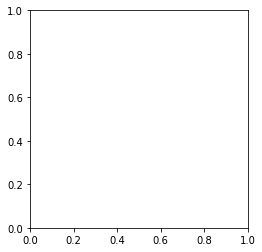

In [174]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(conditionlist)

plt.pie(y)
plt.show() 

Hacer una transformación:
Alumnos hasta  30  años.  Trabajadores  jóvenes 
  30  a 45  años,  trabajadores  veteranos de  46  a 65  y el  resto  serán  clientes  no 
vinculados a la Universidad. Obten un gráfico donde podamos ver como se distribuye cada clase. Interpreta 
los datos. 

In [ ]:
conditionlist2 = [(data['age'] <= 30) ,
    (data['age'] > 30) & (data['age']  <= 45),
    (data['age'] > 45)]
choicelist2 = ['Alumnos ', 'Trabajadores Jóvenes', 'Trabajadores Veteranos']
data['age'] = np.select(conditionlist, choicelist, default='Not Specified')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.pie(conditionlist)
plt.show()



Pasamos el tiempo que llevan los clientes de esta empresa de días a años

In [ ]:
data.duration=data.duration/365
data

In [ ]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.

particiones = np.arange(0, 7, 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(data['duration'], particiones)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec


In [ ]:
particiones = np.arange(0, 7, 0.5)
plt.hist(data['duration'], particiones)
plt.xlabel("Años en la empresa")
plt.ylabel("N° de clientes")
plt.show()